In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [0]:
#
# load the data
#
df = pd.read_csv('synth_temp.csv')

In [0]:
#
# slice 1902 and forward
#
df = df.loc[df.Year > 1901]
df.head()

,Region,Year,RgnAvTemp
292,A,1902,16.932383
293,B,1902,18.294661
294,C,1902,17.522463
295,D,1902,18.353418
296,E,1902,15.669523


In [0]:
#
# roll up by year
#
df_group_year = df.groupby(['Year']).agg({'RgnAvTemp' : 'mean'})
#
# note that the .droplevel() method removes the multiindex 
# added by the .agg() method() to make things simpler
# later on in our analysis
#
df_group_year.head(12)

,RgnAvTemp
Year,
1902,17.007612
1903,17.102858
1904,18.281377
1905,16.944154
1906,16.765670
1907,17.595647
1908,17.425458
1909,18.058278
1910,17.266748


In [0]:
#
# add the Year column so we can use that in a model
#
df_group_year['Year'] = df_group_year.index
df_group_year = df_group_year.rename(columns = {'RgnAvTemp' : 'AvTemp'})
df_group_year.head(20)

,AvTemp,Year
Year,,
1902,17.007612,1902
1903,17.102858,1903
1904,18.281377,1904
1905,16.944154,1905
1906,16.765670,1906
1907,17.595647,1907
1908,17.425458,1908
1909,18.058278,1909
1910,17.266748,1910


In [0]:
#
# construct the model and inspect results
#
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.AvTemp)
print('model slope = ', linear_model.coef_[0])
print('model intercept = ', linear_model.intercept_)
r2 = linear_model.score(df_group_year['Year'].values.reshape((-1, 1)),
                 df_group_year.AvTemp)
print('r squared = ', r2)

model slope =  0.02391321004202961
model intercept =  -28.70711707598515
r squared =  0.6314164203985785


In [0]:
#
# generate predictions for visualization
#
pred_X = df_group_year.loc[:, 'Year']
pred_Y = linear_model.predict(df_group_year['Year'].values.reshape((-1, 1)))

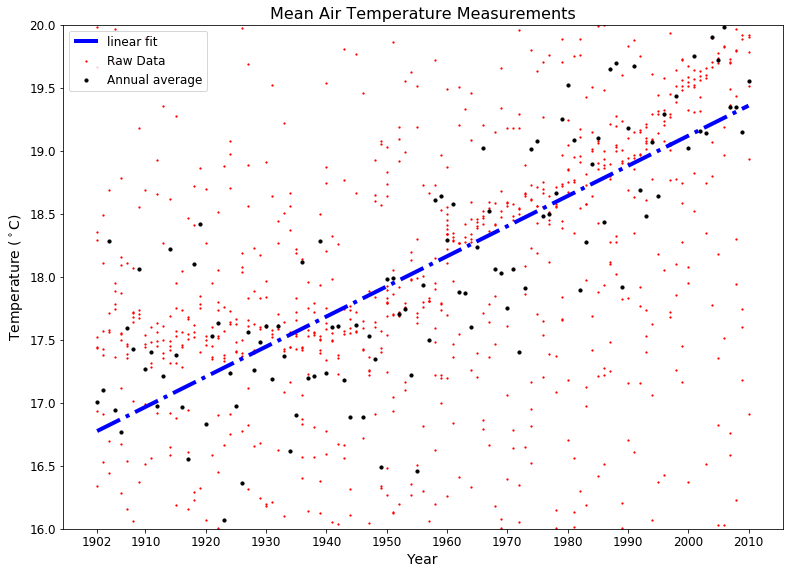

In [0]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([1, 1, 1, 1]);
#
# Raw data
#
raw_plot_data = df[df.Year > 1901]
ax.scatter(raw_plot_data.Year, 
           raw_plot_data.RgnAvTemp, 
           label = 'Raw Data', 
           c = 'red',
           s = 1.5)
#
# Annual averages
#
ax.scatter(df_group_year.Year, 
           df_group_year.AvTemp, 
           label = 'Annual average', 
           c = 'k',
           s = 10)
#
# linear fit
#
ax.plot(pred_X, pred_Y, 
        c = "blue",
        linestyle = '-.',
        linewidth = 4,
        label = 'linear fit')
#
ax.set_title('Mean Air Temperature Measurements',
             fontsize = 16)
#
# make the ticks include the first and last years
#
tick_years = [1902] + list(range(1910, 2011, 10))
ax.set_xlabel('Year', 
              fontsize = 14)
ax.set_ylabel('Temperature ($^\circ$C)', 
              fontsize = 14)
ax.set_ylim(16, 20)
ax.set_xticks(tick_years)
ax.tick_params(labelsize = 12)
ax.legend(fontsize = 12)